
This task for performing sentiment analysis on tweets US airlines sentiment, I will explore the data set looking for trends among the data using different graphs such as pie chart and bar chart, then I will use TF-IDF to convert text data to numerical data so that it can be deployed into the model, then I will use different models such as random forest, logistic regression, and SVC models and select which one works best compared to others, and finally I will recommend how to improve the selected model.





# Import the libraries that will be needed for this task.

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# reading the dataset and display the top 10
airline_tweter_data = pd.read_csv("Tweets.csv")
airline_tweter_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [3]:
airline_tweter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
airline_tweter_data['tweet_created'].max()

'2015-02-24 11:53:37 -0800'

In [5]:
airline_tweter_data['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

Let's explore the dataset a bit to see if we can find any trends. But before that, we will change the default plot size to have a better view of the plots.

Exploration Of Data

Let's first see the number of tweets for each airline. We will plot a pie chart for that:

In [6]:
# set one size for all plots 

plt.rcParams["figure.figsize"] = (10,6)


# let's Perform a comprehensive Exploratory Data Analysis on the dataset.

<AxesSubplot:ylabel='airline'>

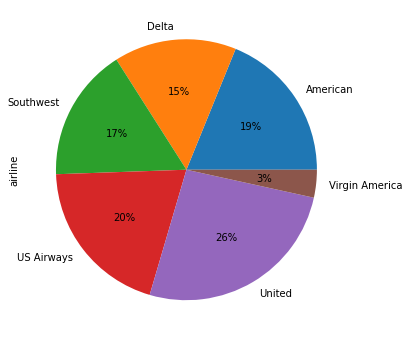

In [7]:
#airline_tweter_data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

airline_tweter_data.airline.str.get_dummies().sum().plot.pie(label='airline', autopct='%1.0f%%')

The percentage of public tweets for each airline is represented in the above pie chart. United Airlines has the most tweets 26% and US Airways has the second-most 20% while Virgin America has a lower proportion of public tweets with 3%.

# Let's now see the distribution of sentiments across all the tweets.

<AxesSubplot:ylabel='airline_sentimental'>

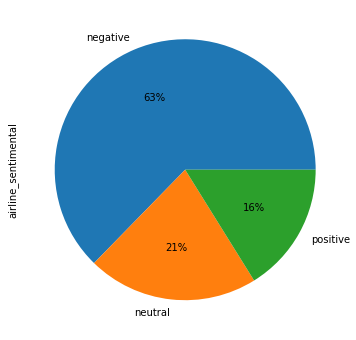

In [8]:
# airline_tweter_data.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

airline_tweter_data.airline_sentiment.str.get_dummies().sum().plot.pie(label='airline_sentimental', autopct='%1.0f%%')

According to the graph above, 63% of tweets regarding US airlines are negative, while 16 and 21 percent are positive and neutral.

<AxesSubplot:xlabel='airline'>

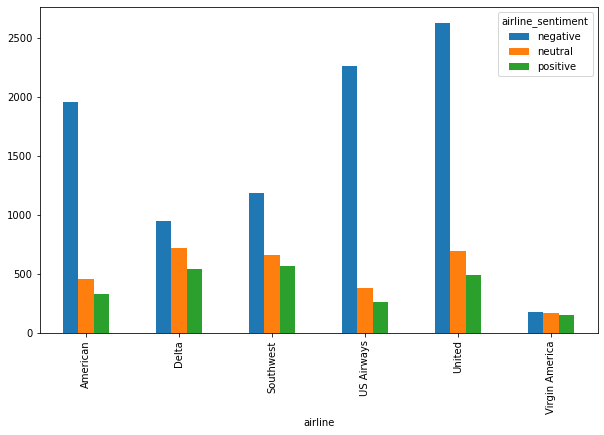

In [9]:
airline_sentiment = airline_tweter_data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
#airline_sentiment
airline_sentiment.plot(kind='bar')

#airline_sentiment.plot(kind='bar',y='airline_sentiment')

The graph displayed for most airlines shows that the majority of tweets are negative, followed by neutral, and positive is the lowest value, but Virgin America stands out by having nearly identical sentimental values.  

let's view the average confidence level for the tweets belonging to three sentiment categories.

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

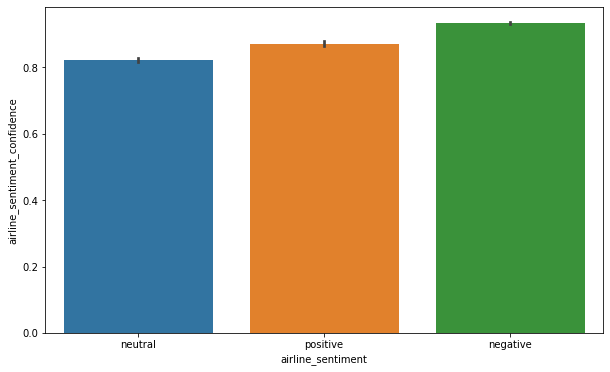

In [10]:

sns.barplot(x = 'airline_sentiment',y = 'airline_sentiment_confidence', data = airline_tweter_data )



According to the result for airline sentiment confidence, negative sentiment is the most predominant when compared to neutral and positive sentiment.

# Data Cleaning

meaningless words appear in tweets. Before we can train the machine learning model, we need to clean up our tweets.
Let us separate our dataset into feature and label sets before cleaning the tweets.

Tweets content can be found on the 11th column index, whereas sentiment labels can be found on the 1st column index from the dataset.

In [11]:
features = airline_tweter_data.iloc[:, 10].values
labels = airline_tweter_data.iloc[:, 1].values


Once we divide the data into features and training set, we can preprocess data in order to clean it.

In [12]:
#To remove noisy data from our features(tweets), we apply regular expressions.
processing_features = []

for words in range(0, len(features)):
    # To begin, all special characters in tweets are removed. re.sub(r'W',", str(features[sentence]) does this.
    processing_feature = re.sub(r'\W', ' ', str(features[words]))

    #Using the re.sub(r's+[a-zA-Z]s+',", processed feature) regular expression, we delete all single characters that remain after deleting the special character. For example, if we substitute the special character'with a space, we get Jack s. Because the letter s has no meaning here, we replace it with a space.
    processing_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processing_feature)

    # Remove single characters from the start
    processing_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processing_feature) 

    # When we replace all single characters with spaces, we get multiple spaces. As a result, we use the re.sub(r's+',", processed feature, flags=re.I) regex to replace all the multiple spaces with single spaces.
    processing_feature = re.sub(r'\s+', ' ', processing_feature, flags=re.I)

    # A character b is inserted to the end of your text string if it is in bytes format. re.sub(r'bs+', ", processed feature) can be used to delete it.
    processing_feature = re.sub(r'^b\s+', '', processing_feature) #Stemming 

    # The lower() function is used to convert the text to lowercase.
    processing_feature = processing_feature.lower()
    
    #to an empty list, attach the processed features
    processing_features.append(processing_feature)


In order to train machine learning models, statistical algorithms are used. Mathematics, on the other hand, only work with numbers. We must first transform text to numbers in order to use statistical algorithms with text. We'll apply TF-IDF methods to accomplish this.

# Using the Scikit-Learn Library to create a TF-IDF

The TfidfVectorizer class in Python's Scikit-Learn module can be used to convert text features into TF-IDF feature vectors.

In [13]:

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processing_features)
#toarray()

# Dividing Data into Training and Test Sets
Our data must be divided into training and testing sets. The training set will be used to train the algorithm, and the test set will be used to evaluate the machine learning model's performance.

In [14]:
!pip install imblearn --user

In [15]:
# check the number of observations in the dataset based on the labels 

In [16]:
positive=np.where(labels=='positive',1,0).sum()
negative=np.where(labels=='negative',1,0).sum()
neutral=np.where(labels=='neutral',1,0).sum()

print('Number of observations in positive class: ',positive)
print('Number of observations in negative class: ',negative)
print('Number of observations in neutral class: ',neutral)

Number of observations in positive class:  2363
Number of observations in negative class:  9178
Number of observations in neutral class:  3099


Below,  I'm resampling the data set after noticing that the labels aren't evenly distributed, to avoid the imbalance in labels 

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy='minority')
processed_features, labels = sm.fit_resample(processed_features, labels)
processed_features, labels = sm.fit_resample(processed_features, labels)

In [18]:
positive=np.where(labels=='positive',1,0).sum()
negative=np.where(labels=='negative',1,0).sum()
neutral=np.where(labels=='neutral',1,0).sum()

print('Number of observations in positive class after resampling: ',positive)
print('Number of observations in negative class after resampling: ',negative)
print('Number of observations in neutral class after resampling: ',neutral)

Number of observations in positive class after resampling:  9178
Number of observations in negative class after resampling:  9178
Number of observations in neutral class after resampling:  9178


In [19]:
# Our test size parameter was set to 0.2, which means that our data set will be divided into two groups, each with 80% and 20% of the data. For training, we'll use 80% of the dataset, and for testing, we'll use 20%.
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Implementing RandomForestClassifier algorithm


The RandomForestClassifier class in the sklearn.ensemble module can be used to train machine learning models using the random forest algorithm. To do so, we must use the RandomForestClassifier class's fit method and feed it our training features and labels as parameters.

In [20]:
# TO train the model
words_classifier = RandomForestClassifier(n_estimators=250, random_state=0)
words_classifier.fit(X_train, y_train)

# Make the Prediction

#The final phase is to make predictions on the model after it has been trained. To do so, we must use the predict() function on the RandomForestClassifier class object that we used for training.
prediction = words_classifier.predict(X_test)


# Evaluating the model

#Finally, classification measures such as a confusion metrix and accuracy can be used to assess the performance of machine learning models.

print(confusion_matrix(y_test,prediction),'\n')

print('Accuracy Score',accuracy_score(y_test, prediction))


[[1573  185   65]
 [ 184 1618   63]
 [  68   93 1658]] 

Accuracy Score 0.8805157072816415


In [21]:
conf=confusion_matrix(y_test,prediction)
accuracy= (conf[0][0] +conf[1][1] +conf[2][2])/conf.sum()
accuracy

0.8805157072816415

In [22]:
#calculating precision-score for random forest model

In [23]:
precision_score(y_test,prediction, average=None)

array([0.86191781, 0.85337553, 0.92833147])

In [24]:
# calculating recall-score for random forest model

In [25]:
recall_score(y_test,prediction, average=None)

array([0.86286341, 0.86756032, 0.91148983])

# Implementing LogisticRegression algorithm

In [26]:
# Training the Algorithm
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

# Making Predictions
y_pred_lr = LR.predict(X_test)

# Evaluating the model
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred_lr))


Accuracy Score: 0.8322135463954966


In [27]:
# calculating recall-score for logistic regression model 

In [28]:
precision_score(y_test,y_pred_lr, average=None)

array([0.83663086, 0.78980557, 0.8719346 ])

In [29]:
# calculating recall-score for logistic regression model

In [30]:
recall_score(y_test,y_pred_lr, average=None)

array([0.8118486 , 0.80589812, 0.87960418])

# Implementing SVM algorithm

In [31]:

svclassifier = SVC(kernel='linear')
# Training the Algorithm
svclassifier.fit(X_train, y_train)
# To make predictions, the predict method of the SVC class is used.
y_pred_svc = svclassifier.predict(X_test)
# Evaluating the Algorithm

print('Accuracy Score',accuracy_score(y_test, y_pred_svc))




Accuracy Score 0.8434719447975304


In [32]:
# calculating recall-score for SCV algorithm

In [33]:
precision_score(y_test,y_pred_svc, average=None)

array([0.85980221, 0.79497693, 0.87969516])

In [34]:
# calculating recall-score for SCV algorothm

In [35]:
recall_score(y_test,y_pred_svc, average=None)

array([0.81075151, 0.83163539, 0.88840022])

Conclusion:


In our case, I chose random forest as a good model compared to the other models I've used in this study after implementing the three models: random forest, logistic regression, and SCV models for classifying positive, negative, and neutral tweets. In comparison to the other two, Random Forest produced good results for the model in terms of accuracy, precision, and recall. I also advise increasing the dataset and retraining the model, because the more we train the model with large data, the more it learns to produce good results, and because we are utilizing data from 2015, it will be preferable to give the model more recent data to rectify the present situation's behavior. So, after putting all of these algorithms to the test in this case, I would suggest random forest as a good model.